In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

# Recommender Systems

## Import Data

In [83]:
date = ['2020-09-07','2020-09-08','2020-09-09','2020-09-10','2020-09-11','2020-09-12','2020-09-13']
dataList = ['A',0.281,74,2448,68.8,'A',0.111,92,3232,35.72,'A',0.186,120,3948,73.29,'A',0.220,63,2207,48.45,'A',0.161,64,2155,34.68,'A',0.064,265,8484,54.29,'A',0.028,241,7857,22.37,'B',0.331,29,863,28.54,'B',0.136,25,800,10.88,'B',0.127,29,986,12.56,'B',0.114,19,593,6.79,'B',0.223,22,739,16.44,'B',0.055,42,1348,7.37,'B',0.013,53,1768,2.3]


model = []
margin = []
customerCount = []
salesAmount = []
netAmount = []

for i in range(0, len(dataList), 5):
    model.append(dataList[i])
    margin.append(dataList[i+1])
    customerCount.append(dataList[i+2])
    salesAmount.append(dataList[i+3])
    netAmount.append(dataList[i+4])

In [141]:
result_df = pd.DataFrame()
result_df['date'] = date*2
result_df['by'] = model
result_df['margin'] = margin
result_df['customer_Count'] = customerCount
result_df['sales_Amount'] = salesAmount
result_df['net_Amount'] = netAmount
result_df['avg_Amount'] = [round(i, 2) for i in result_df.sales_Amount/result_df.net_Amount]

result = result_df.copy()
result

,date,by,margin,customer_Count,sales_Amount,net_Amount,avg_Amount
0,2020-09-07,A,0.281,74,2448,68.80,35.58
1,2020-09-08,A,0.111,92,3232,35.72,90.48
2,2020-09-09,A,0.186,120,3948,73.29,53.87
3,2020-09-10,A,0.220,63,2207,48.45,45.55
4,2020-09-11,A,0.161,64,2155,34.68,62.14
5,2020-09-12,A,0.064,265,8484,54.29,156.27
6,2020-09-13,A,0.028,241,7857,22.37,351.23
7,2020-09-07,B,0.331,29,863,28.54,30.24
8,2020-09-08,B,0.136,25,800,10.88,73.53
9,2020-09-09,B,0.127,29,986,12.56,78.50


In [163]:
print("總受試者共：" + str(result.customer_Count.sum()) + "人")

avg1 = result[result.by=='A'].sales_Amount.sum()/result[result.by=='A'].customer_Count.sum()
avg2 = result[result.by=='B'].sales_Amount.sum()/result[result.by=='B'].customer_Count.sum()
print("\nA組人均貢獻金額：" + str(round(avg1,2)) + "人")
print("B組人均貢獻金額：" + str(round(avg2,2))+ "人")


avg1 = result[result.by=='A'].net_Amount.sum()/result[result.by=='A'].customer_Count.sum()
avg2 = result[result.by=='B'].net_Amount.sum()/result[result.by=='B'].customer_Count.sum()
print("\nA組人均貢獻淨利：" + str(round(avg1,2)) + "人")
print("B組人均貢獻淨利：" + str(round(avg2,2))+ "人")

總受試者共：1138人

A組人均貢獻金額：33.0人
B組人均貢獻金額：32.41人

A組人均貢獻淨利：0.37人
B組人均貢獻淨利：0.39人


## Data Mining

In [151]:
print("A組受試者共：" + str(result[result.by=='A'].customer_Count.sum()) + "人")
result[result_df.by=='A'].describe()

A組受試者共：919人


,margin,customer_Count,sales_Amount,net_Amount,avg_Amount
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.150143,131.285714,4333.000000,48.228571,113.588571
std,0.088768,85.692696,2702.671148,18.693772,112.366222
min,0.028000,63.000000,2155.000000,22.370000,35.580000
25%,0.087500,69.000000,2327.500000,35.200000,49.710000
50%,0.161000,92.000000,3232.000000,48.450000,62.140000
75%,0.203000,180.500000,5902.500000,61.545000,123.375000
max,0.281000,265.000000,8484.000000,73.290000,351.230000


In [152]:
print("B組受試者共：" + str(result[result.by=='B'].customer_Count.sum()) + "人")
result[result_df.by=='B'].describe()

B組受試者共：219人


,margin,customer_Count,sales_Amount,net_Amount,avg_Amount
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.142714,31.285714,1013.857143,12.125714,180.878571
std,0.106092,12.065299,408.721351,8.538282,263.774871
min,0.013000,19.000000,593.000000,2.300000,30.240000
25%,0.084500,23.500000,769.500000,7.080000,59.240000
50%,0.127000,29.000000,863.000000,10.880000,78.500000
75%,0.179500,35.500000,1167.000000,14.500000,135.115000
max,0.331000,53.000000,1768.000000,28.540000,768.700000


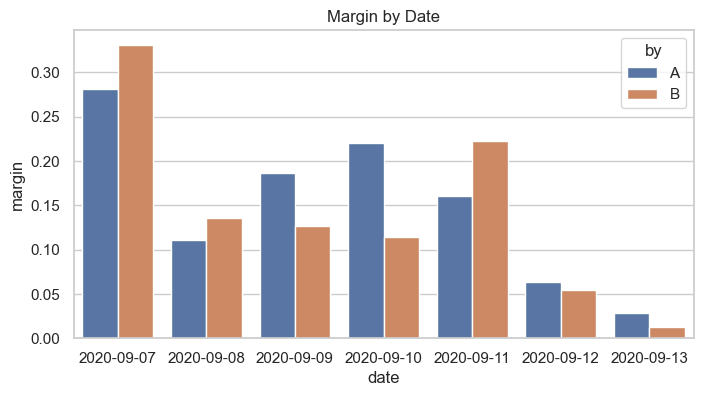

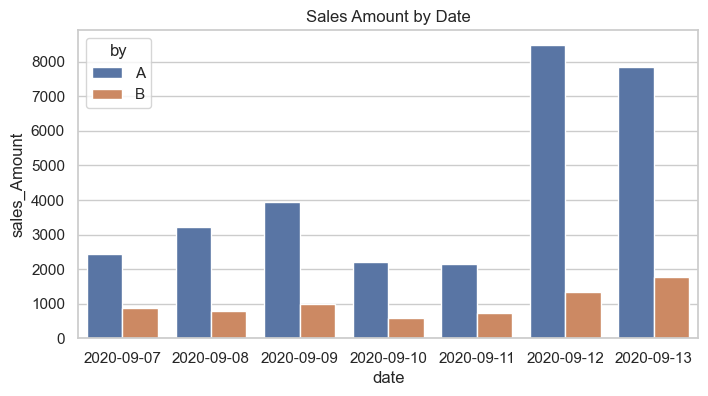

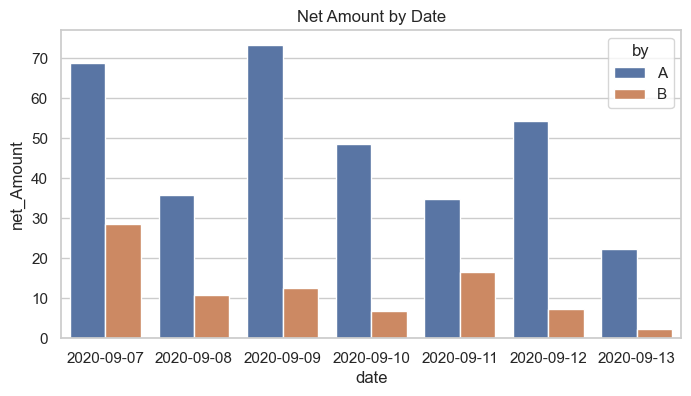

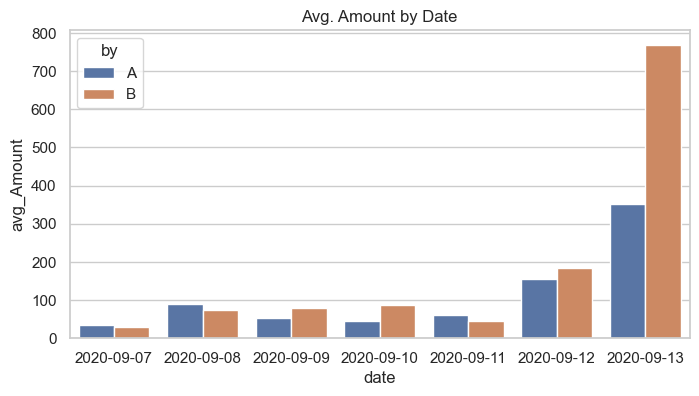

In [149]:
# margin
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))

sns.barplot(x='date', y='margin', hue='by', data=result)
plt.title('Margin by Date')

plt.show()

sns.set(style="whitegrid")

# sales_Amount
plt.figure(figsize=(8, 4)) 

sns.barplot(x='date', y='sales_Amount', hue='by', data=result)
plt.title('Sales Amount by Date')

plt.show()

# net_Amount
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))

sns.barplot(x='date', y='net_Amount', hue='by', data=result)
plt.title('Net Amount by Date')

plt.show()

# avg_Amount
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))

sns.barplot(x='date', y='avg_Amount', hue='by', data=result)
plt.title('Avg. Amount by Date')

plt.show()

## Two Sample T-test for Margin

In [175]:
def get_data_of_t1(df, cat):
    
    A = df[df.by==cat].reset_index(drop = True)
    
    na_A = A.net_Amount.sum()
    sa_A = A.sales_Amount.sum()
    cc_A = A.customer_Count.sum()
    margin_A = na_A/sa_A
    
    marList_A = []
    mList = A.margin
    for i in range(len(A)):
        
        l = [mList[i]] * A.customer_Count[i]
        marList_A.extend(l)

    var_A = np.var(marList_A, ddof=1)
        
    return margin_A, var_A, cc_A

def two_sample_t_test1(df):

    x1, v1, n1 = get_data_of_t1(df, 'A')
    x2, v2, n2 = get_data_of_t1(df, 'B')
    
    t_stat, p_value = stats.ttest_ind_from_stats(mean1 = x1, 
                                                 std1 = np.sqrt(v1) , 
                                                 nobs1 = n1, 
                                                 mean2 = x2, 
                                                 std2 = np.sqrt(v2), 
                                                 nobs2 = n2, 
                                                 equal_var=False)

    return t_stat, p_value

In [176]:
t_stat, p_value = two_sample_t_test1(result)
print(f't_stat為{round(t_stat,4)}，p_value為{round(p_value, 4)}')

t_stat為-0.1113，p_value為0.9115


## Two Sample T-test for Avg. Amount

In [178]:
def get_data_of_t2(df, cat):
    
    A = df[df.by==cat].reset_index(drop = True)
    
    sa_A = A.sales_Amount.sum()
    cc_A = A.customer_Count.sum()   
    avgAmount_A = sa_A/cc_A
    
    amountList_A = []
    aList = A.avg_Amount
    
    for i in range(len(A)):
        
        l = [aList[i]] * A.customer_Count[i]
        amountList_A.extend(l)

    var_A = np.var(amountList_A, ddof=1)
        
    return avgAmount_A, var_A, cc_A

def two_sample_t_test2(df):

    x1, v1, n1 = get_data_of_t2(df, 'A')
    x2, v2, n2 = get_data_of_t2(df, 'B')
    
    t_stat, p_value = stats.ttest_ind_from_stats(mean1 = x1, 
                                                 std1 = np.sqrt(v1) , 
                                                 nobs1 = n1, 
                                                 mean2 = x2, 
                                                 std2 = np.sqrt(v2), 
                                                 nobs2 = n2, 
                                                 equal_var=False)

    return t_stat, p_value

In [179]:
t_stat, p_value = two_sample_t_test2(result)
print(f't_stat為{round(t_stat,4)}，p_value為{round(p_value, 4)}')

t_stat為0.0295，p_value為0.9765


# Recommender Systems

## Import Data

In [215]:
dataList2 = [27,'Male',150,'FALSE','FALSE',47,'Female',300,'TRUE','TRUE',32,'Male',120,'FALSE','FALSE',24,'Male',450,'FALSE','TRUE',45,'Male',300,'TRUE','FALSE',56,'Male',320,'TRUE','TRUE',31,'Male',150,'FALSE','FALSE',23,'Female',300,'TRUE','FALSE',42,'Male',230,'FALSE','FALSE',32,'Female',420,'TRUE','TRUE']

age = []
gender = []
annual_income = []
married = []
buy = []

for i in range(0, len(dataList2), 5):
    age.append(dataList2[i])
    gender.append(dataList2[i+1])
    annual_income.append(dataList2[i+2])
    married.append(dataList2[i+3])
    buy.append(dataList2[i+4])

In [249]:
result_df2 = pd.DataFrame()
result_df2['age'] = age
result_df2['gender'] = gender
result_df2['annual_income'] = annual_income
result_df2['married'] = married
result_df2['buy'] = buy
result_df2.replace({'FALSE':0, 'TRUE':1}, inplace=True)
result_df2.replace({'Female':0, 'Male':1}, inplace=True)

result2 = result_df2.copy()
result2

,age,gender,annual_income,married,buy
0,27,1,150,0,0
1,47,0,300,1,1
2,32,1,120,0,0
3,24,1,450,0,1
4,45,1,300,1,0
5,56,1,320,1,1
6,31,1,150,0,0
7,23,0,300,1,0
8,42,1,230,0,0
9,32,0,420,1,1


## Data Mining

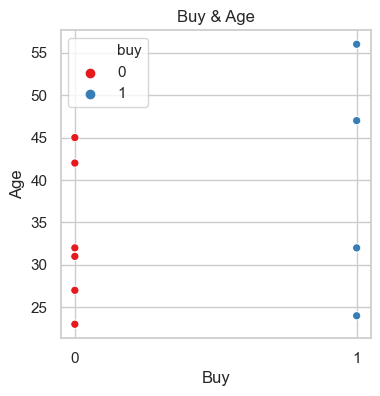

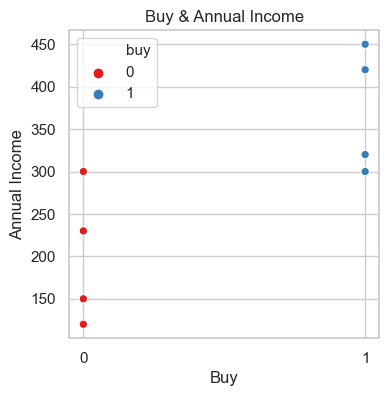

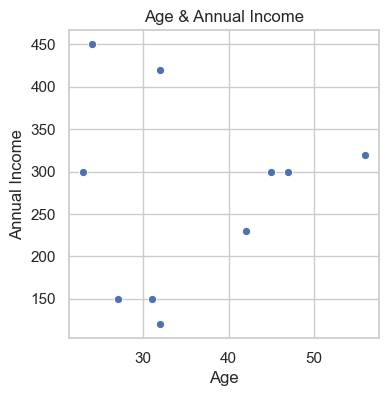

In [250]:
result2 #= result2[result2.gender==0].reset_index(drop = True)
# Buy & Age
plt.figure(figsize=(4, 4))
sns.scatterplot(x='buy', y='age',hue='buy',data=result2, palette='Set1')

plt.xticks([0, 1])
plt.title('Buy & Age')
plt.xlabel('Buy')
plt.ylabel('Age')

plt.show()

# Buy & Annual Income
plt.figure(figsize=(4, 4))
sns.scatterplot(x='buy', y='annual_income', hue='buy', data=result2, palette='Set1')

plt.xticks([0, 1])
plt.title('Buy & Annual Income')
plt.xlabel('Buy')
plt.ylabel('Annual Income')

plt.show()

# Age & Annual Income
plt.figure(figsize=(4, 4))
sns.scatterplot(x = 'age', y='annual_income', data=result2)

# 可以使用以下代碼調整 x 軸上的類別標籤的顯示角度

plt.title('Age & Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')

plt.show()

In [229]:
x_simple = np.array(result2.annual_income)
y_simple = np.array(result2.age)
my_rho = np.corrcoef(x_simple, y_simple)

print(my_rho)

[[1.         0.04456577]
 [0.04456577 1.        ]]


In [263]:
result2_1 = result2[result2.annual_income>=300].reset_index(drop = True)
print('\n收入大於等於300K------------------\n')
print(result2_1)
print('\n收入大於等於300K＆有購買行為------------------\n')
print(result2_1[result2_1.buy==1].reset_index(drop = True))
print('\n收入大於等於300K＆購買行為--------------------\n')
print(result2_1[result2_1.buy==0].reset_index(drop = True))


收入大於等於300K------------------

   age  gender  annual_income  married  buy
0   47       0            300        1    1
1   24       1            450        0    1
2   45       1            300        1    0
3   56       1            320        1    1
4   23       0            300        1    0
5   32       0            420        1    1

收入大於等於300K＆有購買行為------------------

   age  gender  annual_income  married  buy
0   47       0            300        1    1
1   24       1            450        0    1
2   56       1            320        1    1
3   32       0            420        1    1

收入大於等於300K＆購買行為--------------------

   age  gender  annual_income  married  buy
0   45       1            300        1    0
1   23       0            300        1    0


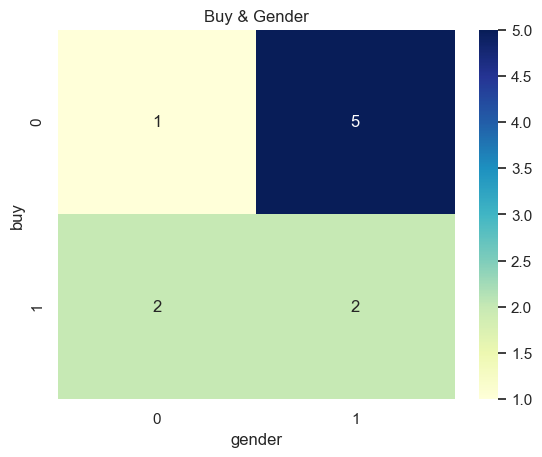

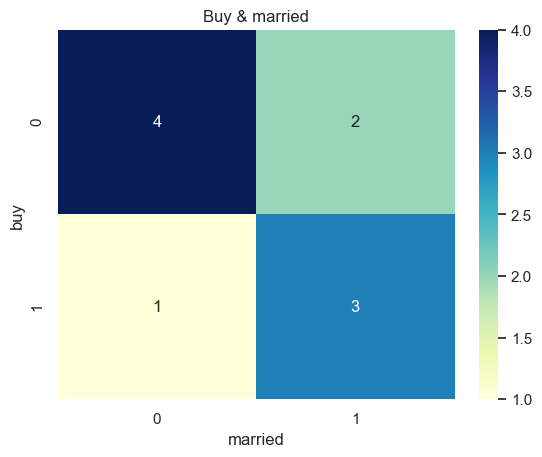

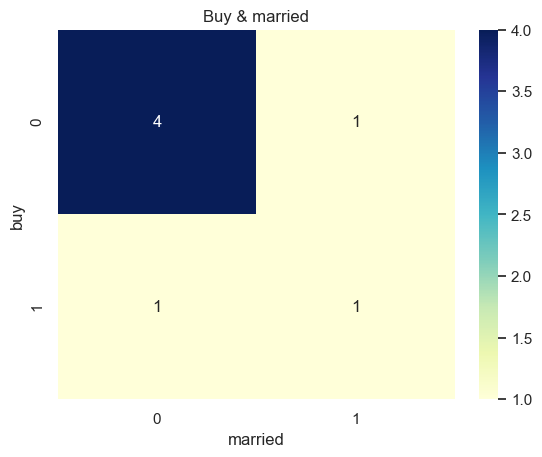

In [252]:
# Buy & Gender
cross_tab = pd.crosstab(result2['buy'], result2['gender'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Buy & Gender')
plt.show()

# Buy & married
cross_tab = pd.crosstab(result2['buy'], result2['married'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Buy & married')
plt.show()

# Buy & married
result2_2 = result2[result2.gender==1].reset_index(drop = True)
cross_tab = pd.crosstab(result2_2['buy'], result2_2['married'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Buy & married')
plt.show()